In [1]:
from sklearn.preprocessing import Normalizer
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from model import GGNN
import torch.nn as nn
import time
import sys
from tqdm import tqdm
from model import Utils
from model import Plot

# Load Data

In [2]:
folder = 'dataset/'
TrainDataset14 = torch.load(folder + 'train_dataset14.pt')
TrainDataset15 = torch.load(folder + 'train_dataset15.pt')

TestDataset14 = torch.load(folder + 'test_dataset14.pt')
TestDataset15 = torch.load(folder + 'test_dataset15.pt')

#UnrelatedDataset = torch.load('unrelated_dataset_rev6.pt')

adj_matrices14 = torch.load(folder + 'adj_matrices14.pt')
adj_matrices15 = torch.load(folder + 'adj_matrices15.pt')

#adj_matrices2 = torch.load(folder + 'adj_matrices.pt')

#dist_matrices = torch.load(folder + 'dist_matrices.pt')

## Hyperparameters

In [3]:
EPOCHS = 400 # 400 Training Epochs

PROPAG_STEPS = 5 # Neighborhood Interation
HIDDEN_LAYER = 64 # Hidden Layeer Size

BATCH_SIZE = 45 # Bath_size to train/test

STEPS_PER_EPOCH15 = int((len(TrainDataset15)/BATCH_SIZE) * 3) # 3 times
STEPS_PER_EPOCH14 = int((len(TrainDataset14)/BATCH_SIZE) * 3) # 3 times

## Create a model

In [4]:
model = GGNN.GGNNModel(1, HIDDEN_LAYER, PROPAG_STEPS).cuda()

## Train

In [5]:
model, optimizer, statistics  = Utils.Train(EPOCHS, TrainDataset15, model, STEPS_PER_EPOCH15,\
                                   adj_matrices15, BATCH_SIZE)


# saving
torch.save(model.state_dict(), '_model_state_dict.pt')
torch.save(optimizer.state_dict(), '_optimizer_state_dict.pt')
torch.save(statistics, '_training_statistics.pt')

Epoch: 68 - Loss: 0.4 - Total_Time: 9.5 mins: 100%|██████████████████████████████████| 580/580 [00:08<00:00, 68.42it/s]


Epoch: 136 - Loss: 0.23 - Total_Time: 19.0 mins: 100%|███████████████████████████████| 580/580 [00:08<00:00, 70.43it/s]


Epoch: 204 - Loss: 0.09 - Total_Time: 28.6 mins: 100%|███████████████████████████████| 580/580 [00:08<00:00, 65.43it/s]


Epoch: 272 - Loss: 0.15 - Total_Time: 38.0 mins: 100%|███████████████████████████████| 580/580 [00:08<00:00, 70.01it/s]


Epoch: 340 - Loss: 0.04 - Total_Time: 47.3 mins: 100%|███████████████████████████████| 580/580 [00:08<00:00, 70.59it/s]


Epoch: 400 - Loss: 0.14 - Total_Time: 55.7 mins: 100%|███████████████████████████████| 580/580 [00:08<00:00, 69.72it/s]


# Test

In [6]:
_, _, statistics_tst  = Utils.Test(EPOCHS, TestDataset14, model, STEPS_PER_EPOCH14,\
                                   adj_matrices14, BATCH_SIZE)

Epoch: 68 - Loss: 0.47 - Total_Time: 3.5 mins: 100%|█████████████████████████████████| 220/220 [00:03<00:00, 71.04it/s]


Epoch: 136 - Loss: 0.59 - Total_Time: 7.5 mins: 100%|████████████████████████████████| 220/220 [00:03<00:00, 62.28it/s]


Epoch: 204 - Loss: 0.36 - Total_Time: 11.2 mins: 100%|███████████████████████████████| 220/220 [00:03<00:00, 63.85it/s]


Epoch: 272 - Loss: 0.34 - Total_Time: 14.9 mins: 100%|███████████████████████████████| 220/220 [00:03<00:00, 68.04it/s]


Epoch: 340 - Loss: 0.27 - Total_Time: 18.5 mins: 100%|███████████████████████████████| 220/220 [00:03<00:00, 68.81it/s]


Epoch: 400 - Loss: 0.26 - Total_Time: 21.8 mins: 100%|███████████████████████████████| 220/220 [00:03<00:00, 67.34it/s]


# Plots

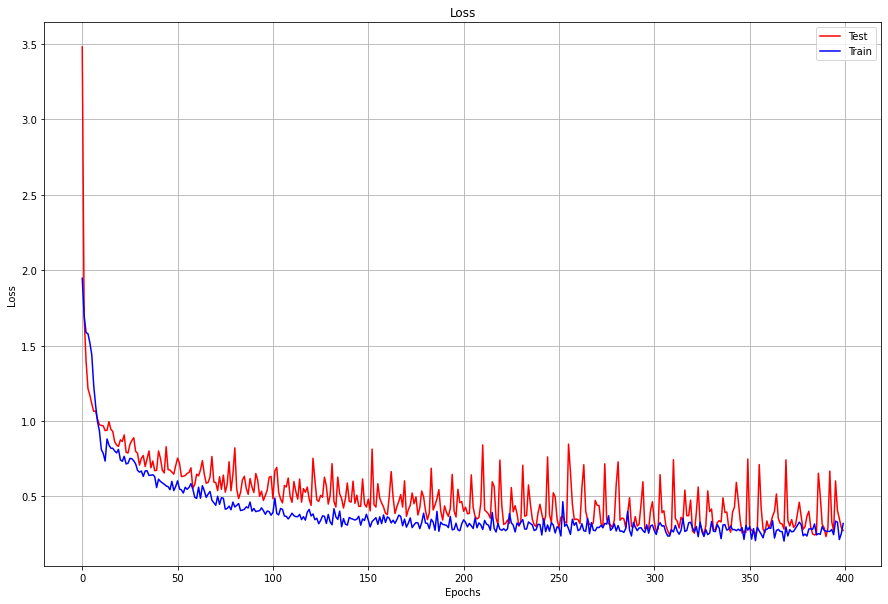

In [7]:
name = 'PROPAG_STEPS: {}, HIDDEN_LAYER: {}, BATCH_SIZE: {}, EPOCHS: {}'.format(PROPAG_STEPS,\
                                                HIDDEN_LAYER, BATCH_SIZE,EPOCHS)
title = 'Loss'

Plot.Plot(statistics['loss_ls'], statistics_tst['loss_ls'], title)

In [8]:
statistics.keys()

dict_keys(['loss_ls', 'accuracy', 'correct', 'predict'])

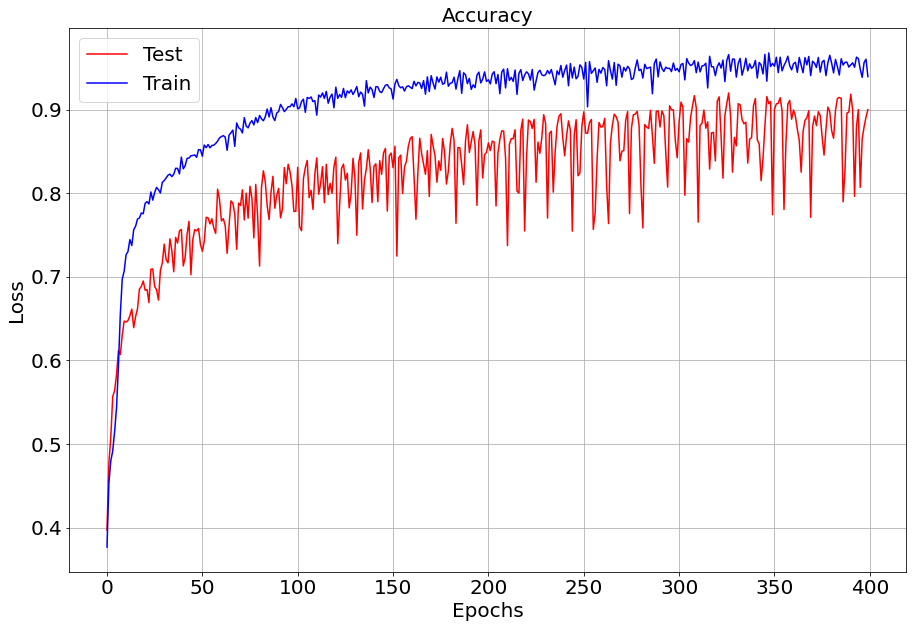

In [9]:
title_Acc = 'Accuracy'
Plot.Plot(statistics['accuracy'], statistics_tst['accuracy'], title_Acc)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.861871  0.012897  0.084022  0.000555  0.029586  0.002613   
1          0.003493  0.972679  0.001935  0.000069  0.000000  0.000090   
2          0.097129  0.003831  0.885220  0.000612  0.118343  0.004391   
3          0.006407  0.000279  0.003065  0.993495  0.017751  0.001499   
5          0.008721  0.007972  0.008187  0.000758  0.751479  0.979336   
9          0.017445  0.002061  0.013948  0.003376  0.082840  0.011930   
11         0.004935  0.000280  0.003623  0.001134  0.000000  0.000141   

Predicted        6         7         8         9         10        11  
Actual                                                                 
0          0.037037  0.223020  0.000000  0.003208  0.040984  0.032847  
1          0.055556  0.129082  0.000000  0.000020  0.016393  0.000869  
2          0.055556  0.167

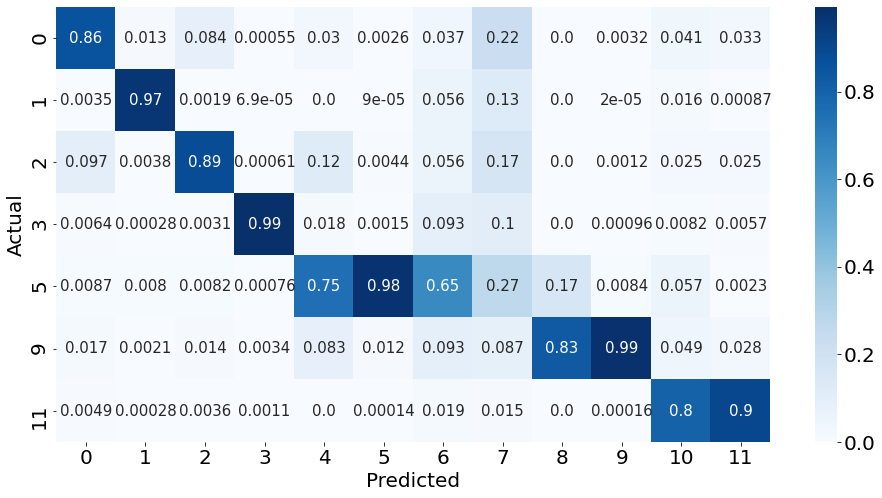

In [10]:
save_name = 'Confusion_Matrix_Train'
color= 'Blues'
folder = 'dataset/'
Plot.Conf_Matrix(statistics['correct'], statistics['predict'], color, folder)

>> condusion Matrix <<
Test
Predicted         0         1         2         3         4         5  \
Actual                                                                  
0          0.914442  0.006139  0.004052  0.005532  0.004546  0.004326   
1          0.010796  0.828044  0.039607  0.042391  0.010315  0.007077   
2          0.001567  0.031565  0.713646  0.045292  0.017537  0.008234   
3          0.009405  0.044455  0.126819  0.760761  0.029586  0.025054   
4          0.004359  0.018479  0.015082  0.049428  0.742644  0.114527   
5          0.004673  0.014841  0.024764  0.017799  0.172091  0.815814   
6          0.049119  0.005917  0.014371  0.006510  0.013241  0.014290   
7          0.005640  0.050560  0.061660  0.072288  0.010041  0.010678   

Predicted         6         7  
Actual                         
0          0.042031  0.009585  
1          0.025669  0.030292  
2          0.008244  0.009270  
3          0.012914  0.014075  
4          0.085003  0.047561  
5          0.0245

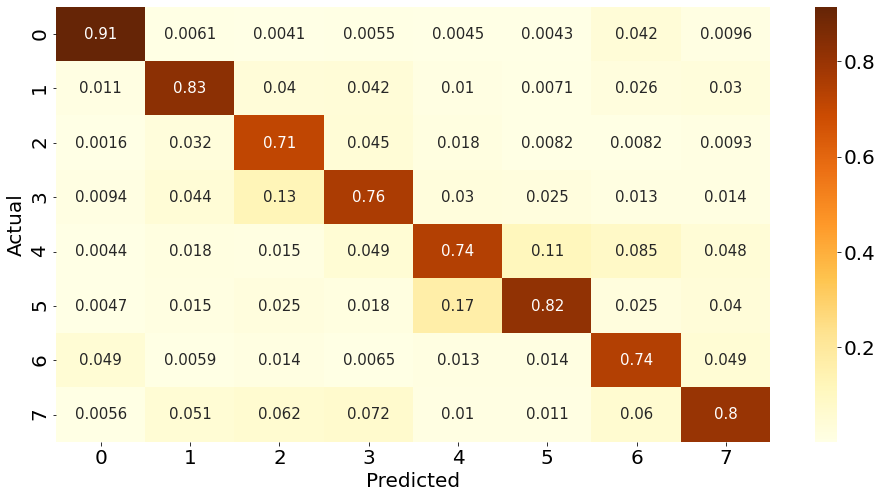

In [11]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics_tst['correct'], statistics_tst['predict'], color, folder)

In [12]:
''' Neste exemplo treinou-se utilizando o dataset14 qual tem um menor número
de locais com vazamento, e aplicou-se o mesmo no dataset15 com quantidade
maior de locais pontos com vazamento, obtendo os resultados apresentados acima'''

' Neste exemplo treinou-se utilizando o dataset14 qual tem um menor número\nde locais com vazamento, e aplicou-se o mesmo no dataset15 com quantidade\nmaior de locais pontos com vazamento, obtendo os resultados apresentados acima'